## Group Project Proposal

## Heart Disease

## Introduction

<img align="left" src="https://domf5oio6qrcr.cloudfront.net/medialibrary/5042/n0318g16207256840245.jpg" width="200"/>

*image source: https://www.health.harvard.edu/heart-health/a-closer-look-at-heart-disease-risk*

**Background Information**
- Heart disease is a broad term for a variety of conditions that affect the functionality or health of the heart. 

**Predictive Analysis Question**
- Can the presence of heart disease in a patient be predicted using their chart data?

**Dataset Information**
- The dataset contains patient chart data provided by physicians from the Cleveland Clinic Foundation and the Long Beach V.A. Medical Centre in the United States. The processed data, donated on July 1st, 1998, contains 14 different variables from patient charts that are known to cause, correlate with, or result from heart disease. 

## Preliminary exploratory data analysis

**Loading R libraries**

In [2]:
### Run the R libraries 
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows
options(repr.plot.width=10, repr.plot.height=10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Reading the data into R**

In [3]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE) 
       
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "num")
cleveland_data <- cleveland_data |>
mutate(num = as_factor(num))

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Filtering the n.a./missing values** 

We can see that only the ca and thal columns are in chr data type, while every other column is in numeric data type (dbl). This indicates that only ca and thal have missing value since we know that the missing value are represented by "?" in this dataset. We can then filter the "?" out of these two columns, and use the drop_na() function to make sure we drop all the n.a. values.

In [4]:
filtered_data <- cleveland_data |>
filter(ca != "?", thal != "?")|>
drop_na()


filtered_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Next, because the factors 1,2,3 and 4 in the "num" column all indicate the presence of heart disease in a patient, we mutate and combine them into a single variable for convenience.**

In [5]:
mutate_data <- filtered_data |>
mutate(num = ifelse(num == 0, 0, 1)) |>
mutate(num = as_factor(num))


mutate_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Changing the column data type**

Now that we've cleared the missing values, we can mutate the "ca" and "thal" columns from character to numeric data types.

In [6]:
final_data <- mutate_data |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))

final_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


Next, we can split the data into training and testing data.

In [7]:
heart_split <- initial_split(final_data, prop = 0.75, strata = num)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

heart_train
heart_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
61,1,4,148,203,0,0,161,0,0.0,1,1,7,1
55,0,2,132,342,0,0,166,0,1.2,1,0,3,0
63,0,4,124,197,0,0,136,1,0.0,2,0,3,1


**Summarizing the Data**

In [8]:
count_sex <- heart_train|>
    group_by(sex)|>
    summarize(n = n())

count_fbs <- heart_train|>
    group_by(fbs)|>
    summarize(n = n())

count_restecg <- heart_train|>
    group_by(restecg)|>
    summarize(n = n())

count_exang <- heart_train|>
    group_by(exang)|>
    summarize(n = n())

count_slope <- heart_train|>
    group_by(slope)|>
    summarize(n = n())

count_ca <- heart_train|>
    group_by(ca)|>
    summarize(n = n())

count_thal <- heart_train|>
    group_by(thal)|>
    summarize(n = n())

count_cp <- heart_train|>
    group_by(cp)|>
    summarize(n = n())

count_sex
count_fbs
count_restecg
count_exang
count_slope
count_ca
count_thal
count_cp

sex,n
<dbl>,<int>
0,75
1,147


fbs,n
<dbl>,<int>
0,188
1,34


restecg,n
<dbl>,<int>
0,107
1,3
2,112


exang,n
<dbl>,<int>
0,152
1,70


slope,n
<dbl>,<int>
1,98
2,107
3,17


ca,n
<dbl>,<int>
0,126
1,53
2,29
3,14


thal,n
<dbl>,<int>
3,123
6,13
7,86


cp,n
<dbl>,<int>
1,16
2,39
3,65
4,102


In [9]:
mean_data <- heart_train|>
    select(age,trestbps,chol,thalach,oldpeak)|>
    summarize(across(age:oldpeak, mean, na.rm = TRUE))
mean_data

age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.63514,132.6081,246.0811,149.3964,1.061712


**Discover the distribution of heart disease**

In [10]:
counting_types <- heart_train |>
    group_by(num)|>
    summarize(types_count = n()) 
counting_types

num,types_count
<fct>,<int>
0,120
1,102


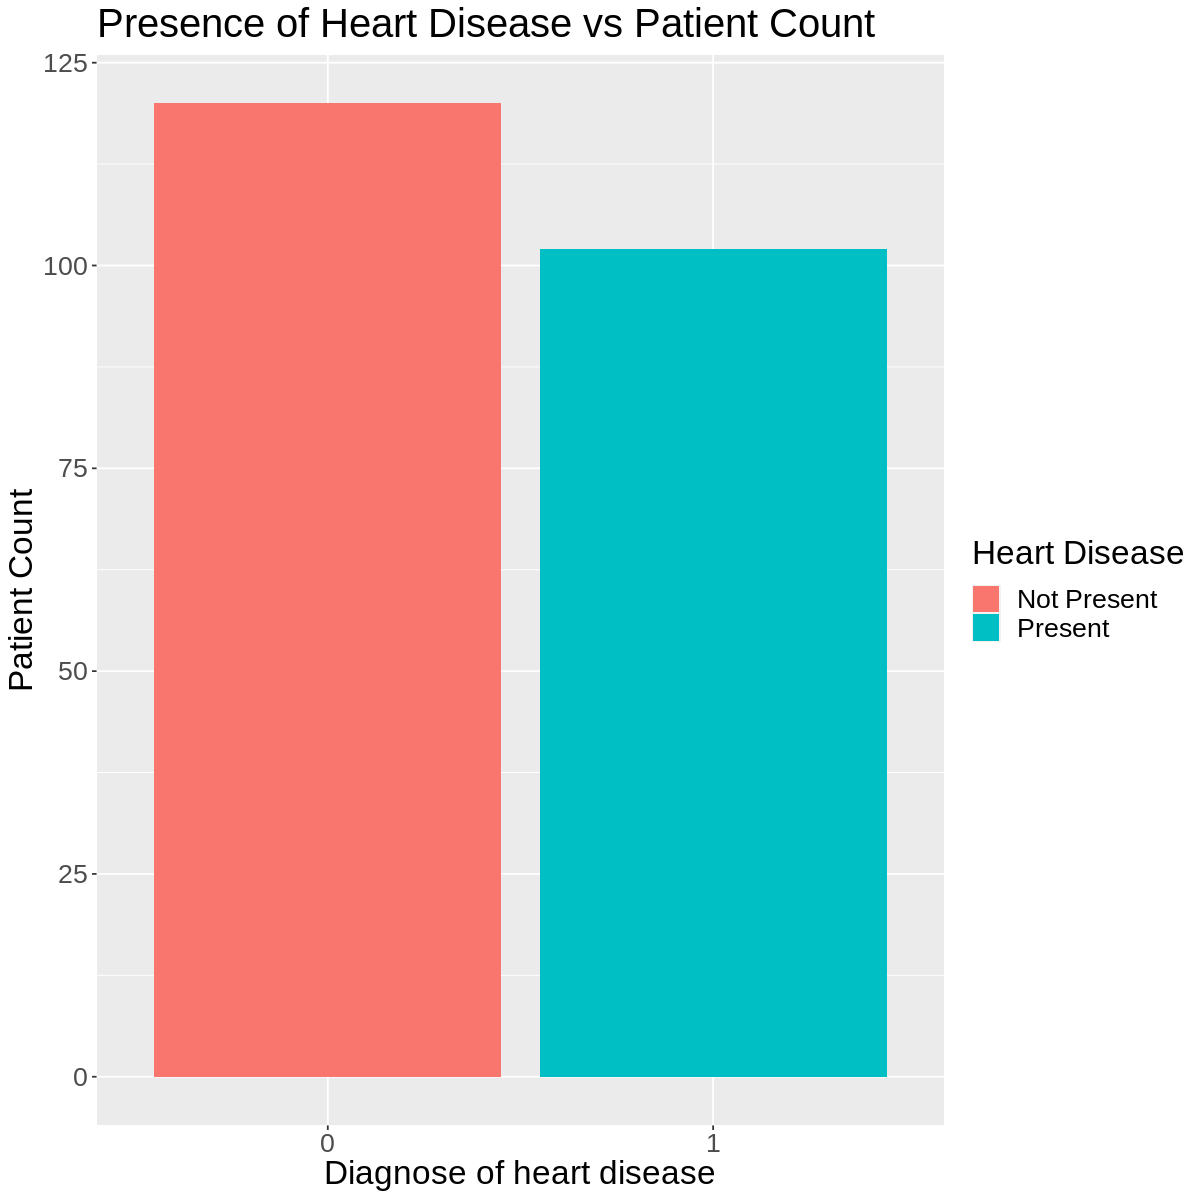

In [12]:
type_vs_num <- counting_types |>
    ggplot(aes(x = num, y = types_count, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "Diagnose of heart disease",y = "Patient Count", color = "Heart Disease") +
    ggtitle("Presence of Heart Disease vs Patient Count") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
    theme(text = element_text(size = 20))
type_vs_num

We can see from the graph above that the two different classifications for the presence of heart disease are not evenly distributed in the data set. What we can do in the future is use the `up_sampling()` function from `library(themis)` in our classification recipe to balance the distribution of different types. Neeeeeeeeeed Change !

**Visualizing data**

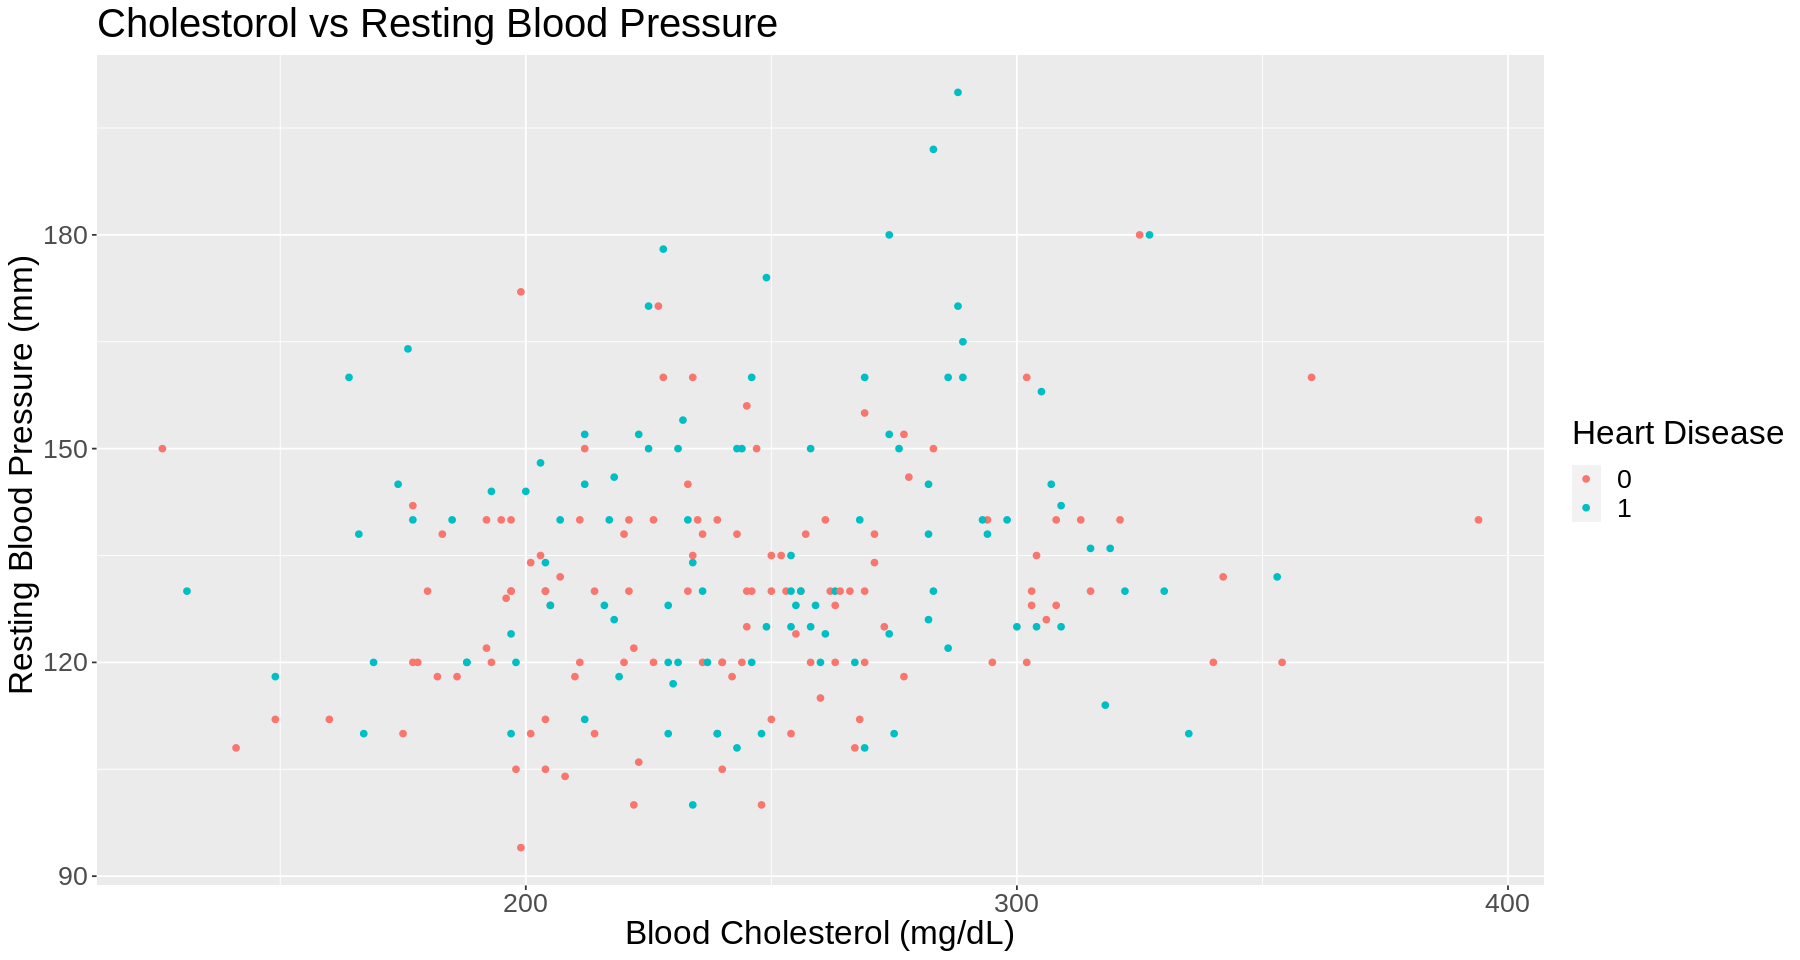

In [43]:
options(repr.plot.width = 15, repr.plot.height = 8) 

trestbps_vs_chol <- heart_train |>
    ggplot(aes(x = chol , y = trestbps, color = num))+
    geom_point()+
    labs(x = "Blood Cholesterol (mg/dL)", y = "Resting Blood Pressure (mm) ", color = "Heart Disease", labels = c("Not Present", "Present")) +
    ggtitle("Cholestorol vs Resting Blood Pressure")+
    theme(text = element_text(size = 20))
trestbps_vs_chol

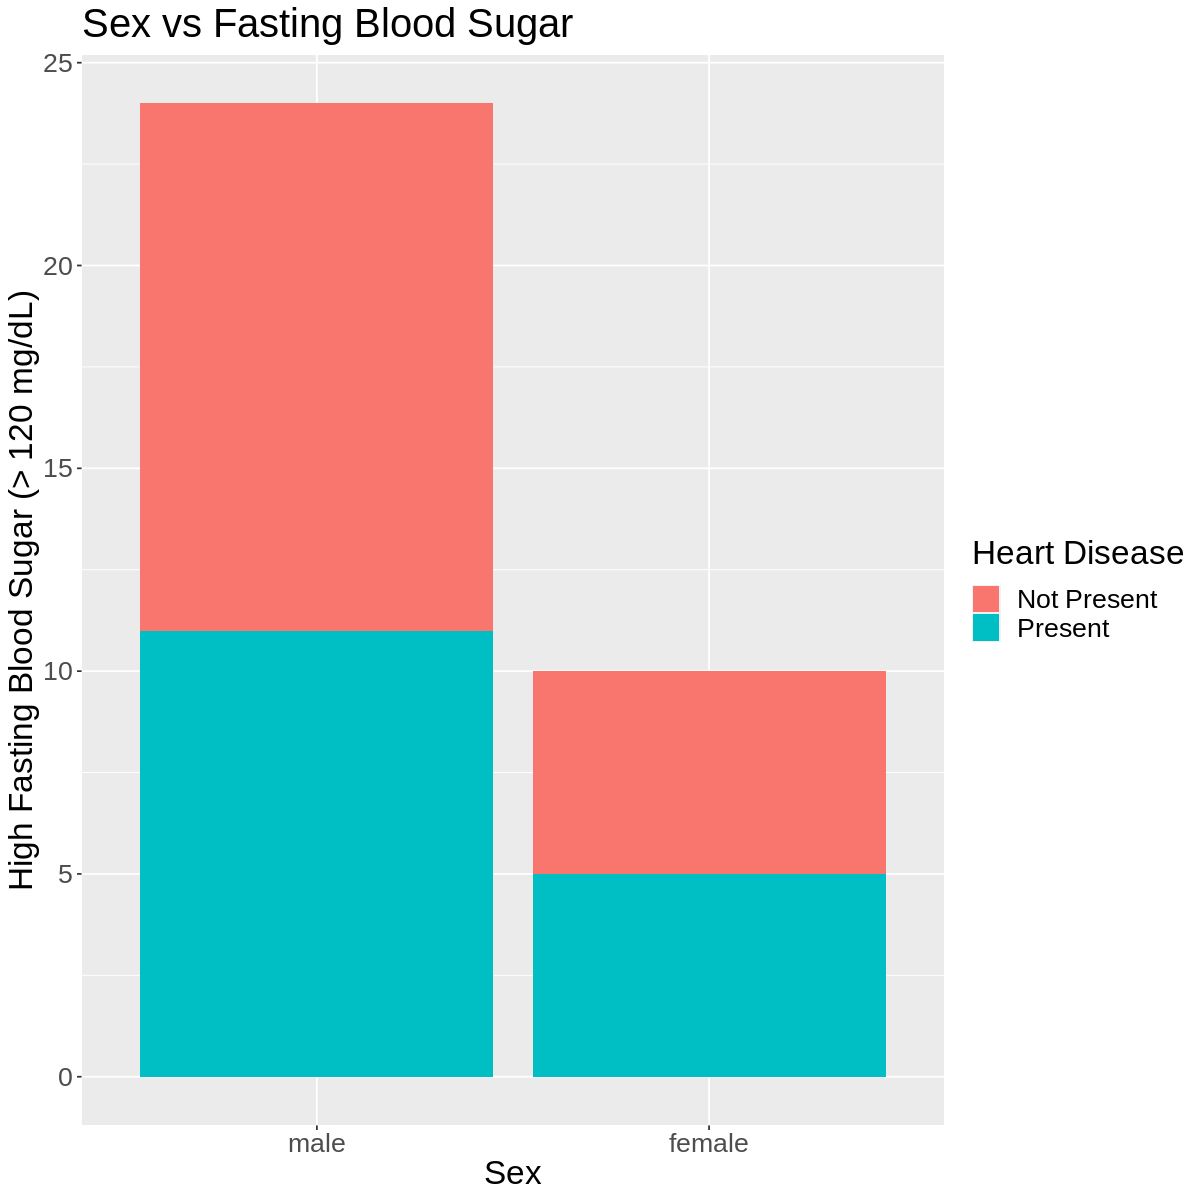

In [16]:
age_plot  <- heart_train |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = fbs, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "Sex", y = "High Fasting Blood Sugar (> 120 mg/dL)", fill = "Heart Disease") +
    ggtitle("Sex vs Fasting Blood Sugar") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
    theme(text = element_text(size = 20))
age_plot

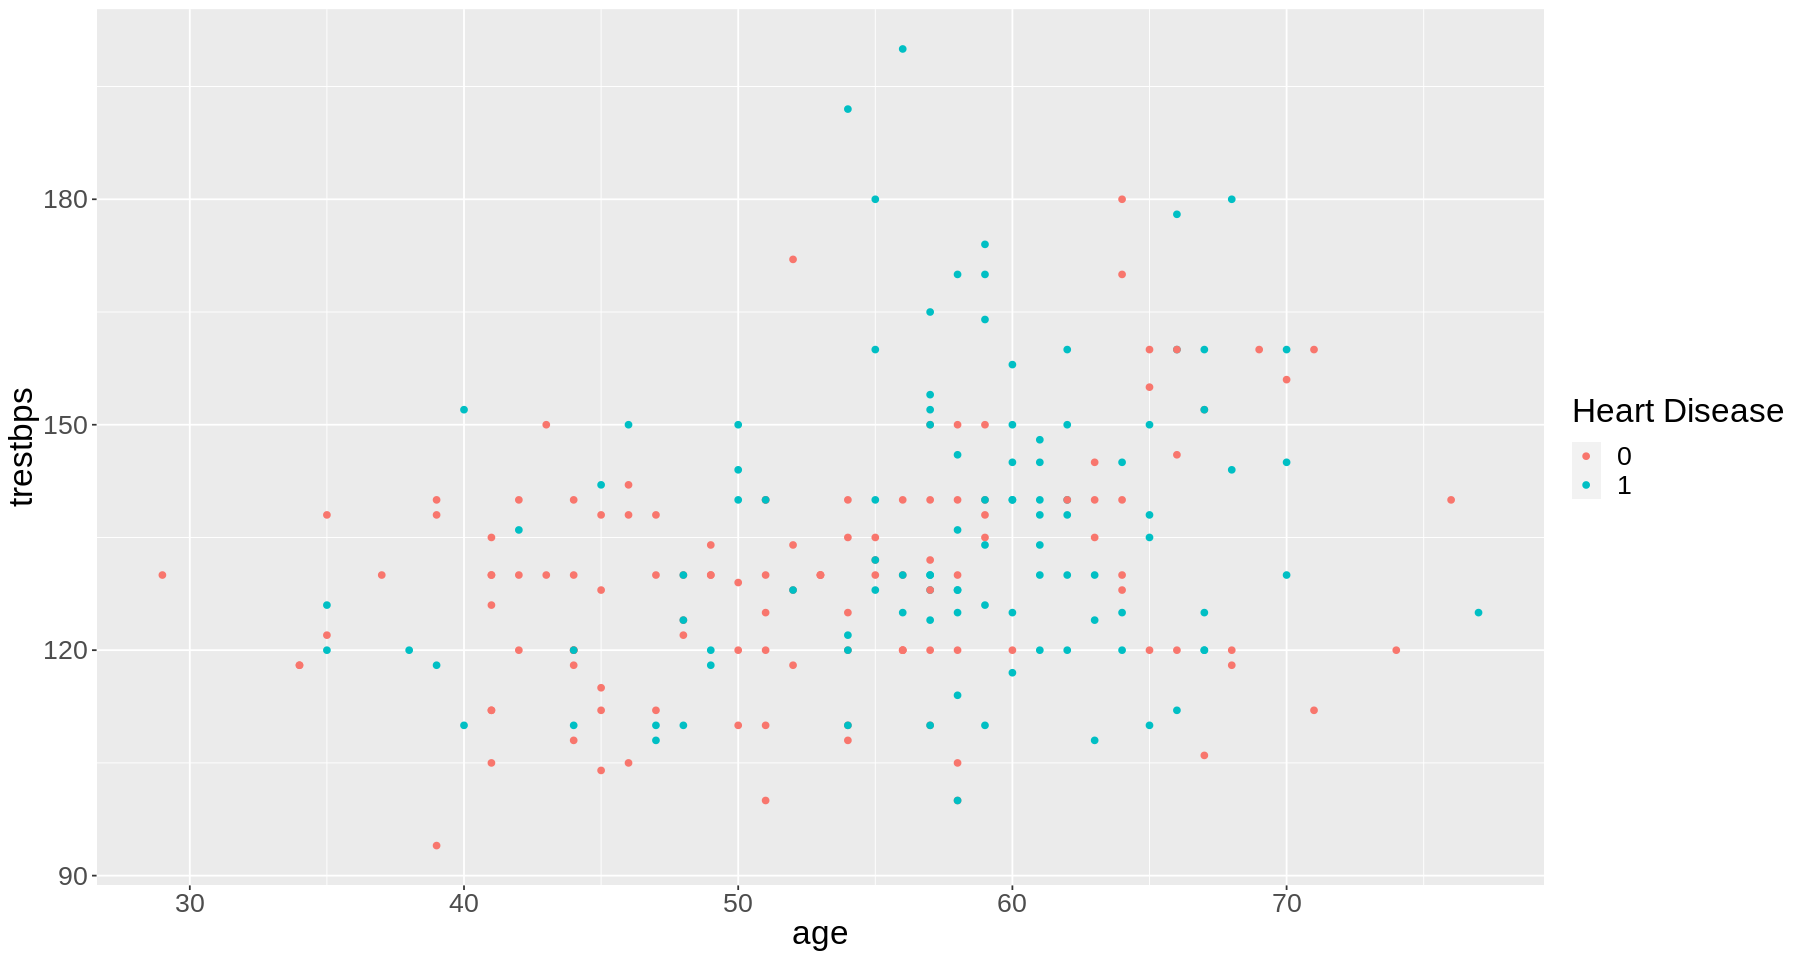

In [47]:
trestbps_vs_age <- heart_train |>
    ggplot(aes(x = age , y = trestbps, color = num)) +
    geom_point() +
    labs(x = "age", y = "trestbps", color = "Heart Disease") +
    theme(text = element_text(size = 20))
trestbps_vs_age

Here, we visualize the distribution of chest pain types of males vs females.

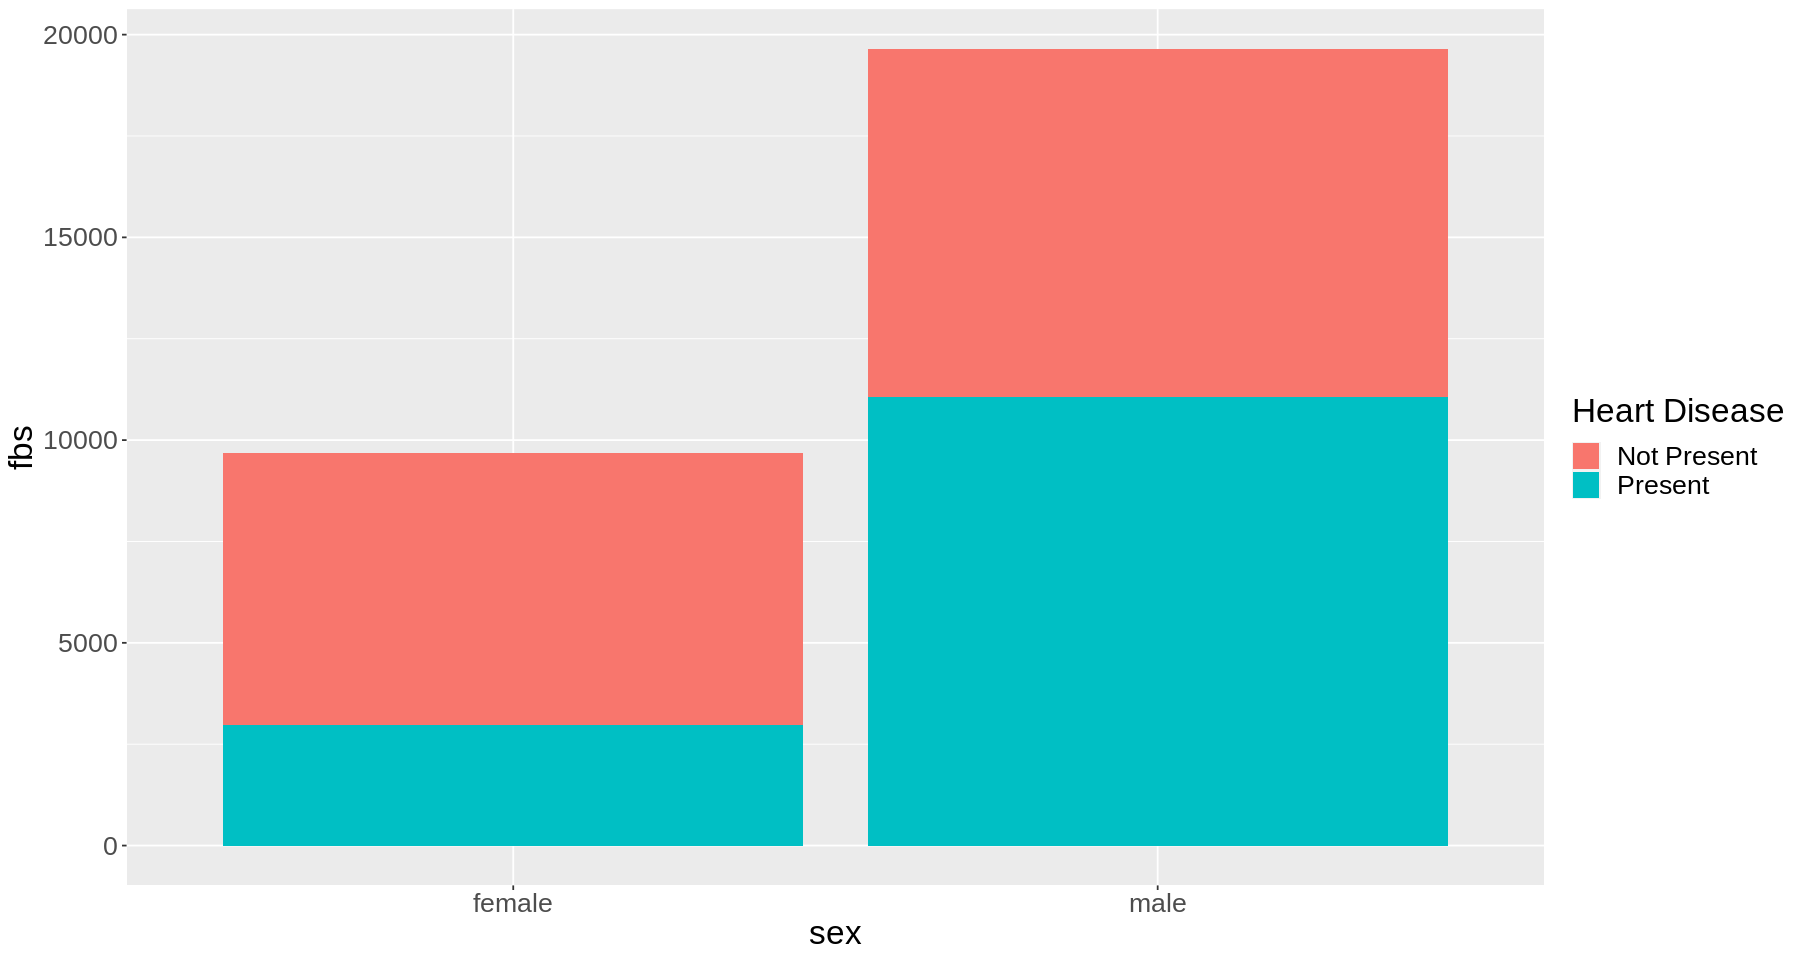

In [49]:
sex_vs_fbs  <- heart_train |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = trestbps, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "fbs", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
    theme(text = element_text(size = 20))
sex_vs_fbs

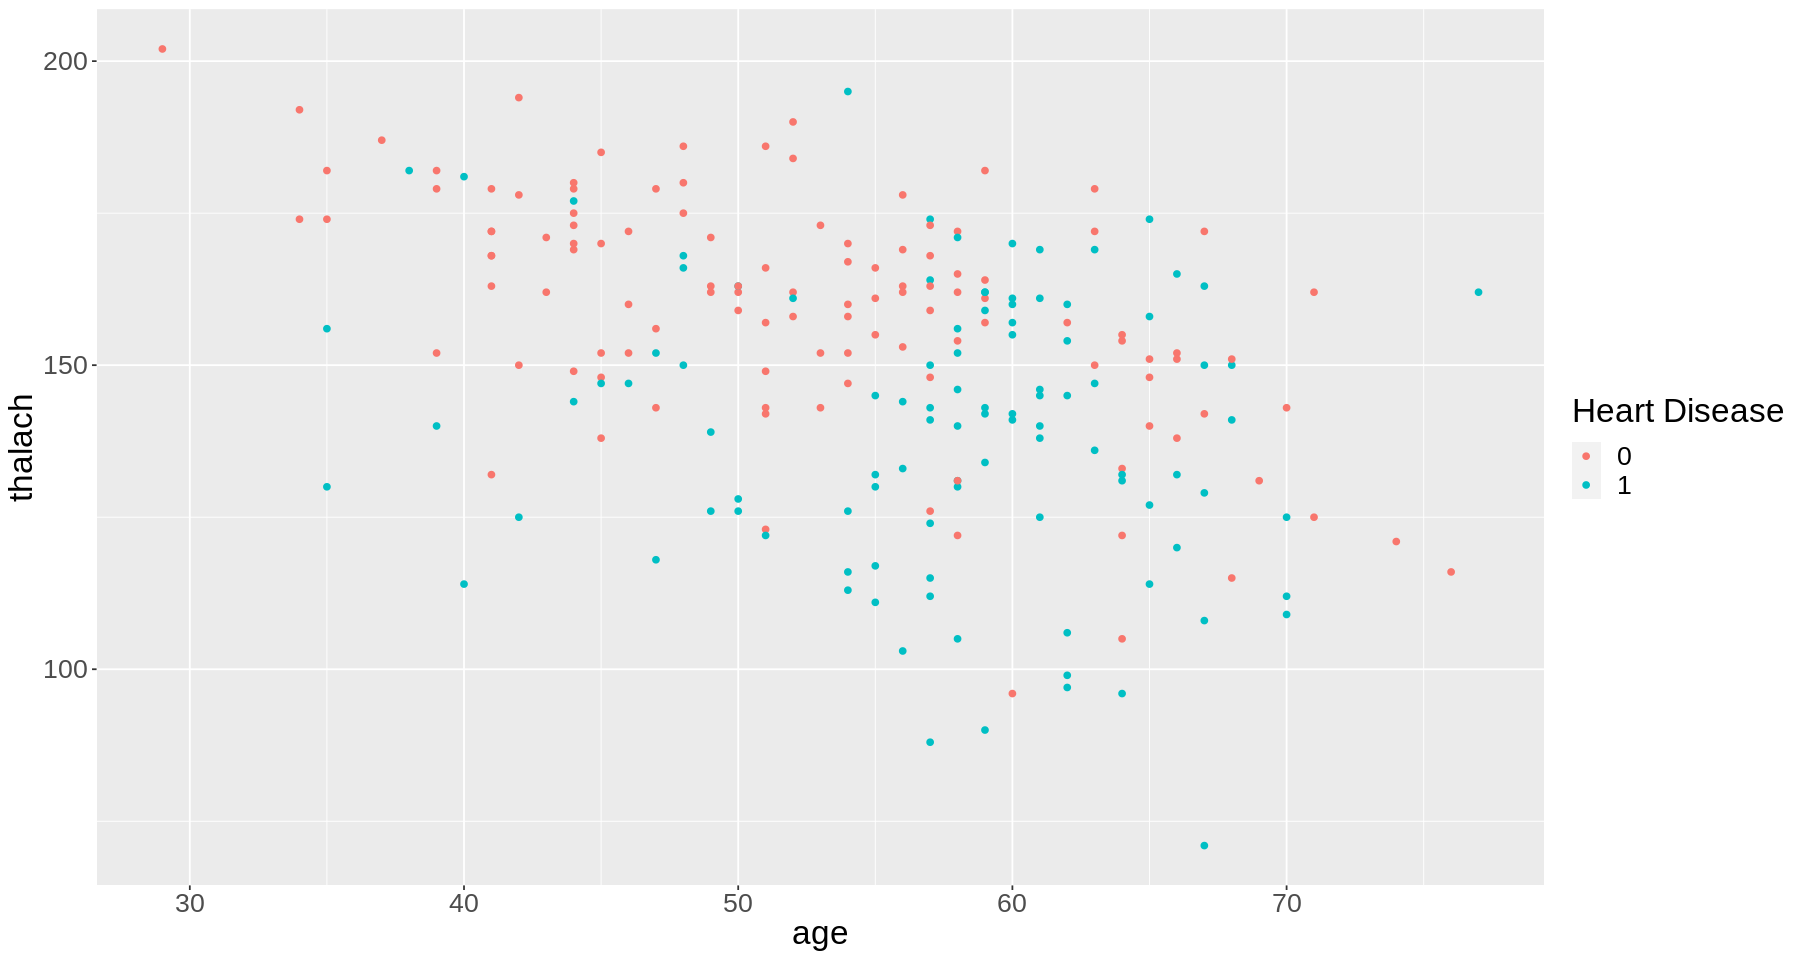

In [50]:
age_vs_thalach <- heart_train |>
    ggplot(aes(x = age , y = thalach, color = num)) +
    geom_point()+
    labs(x = "age", y = "thalach", color = "Heart Disease") +
    theme(text = element_text(size = 20))
age_vs_thalach

**Overlaying distribution of the predictor variable**

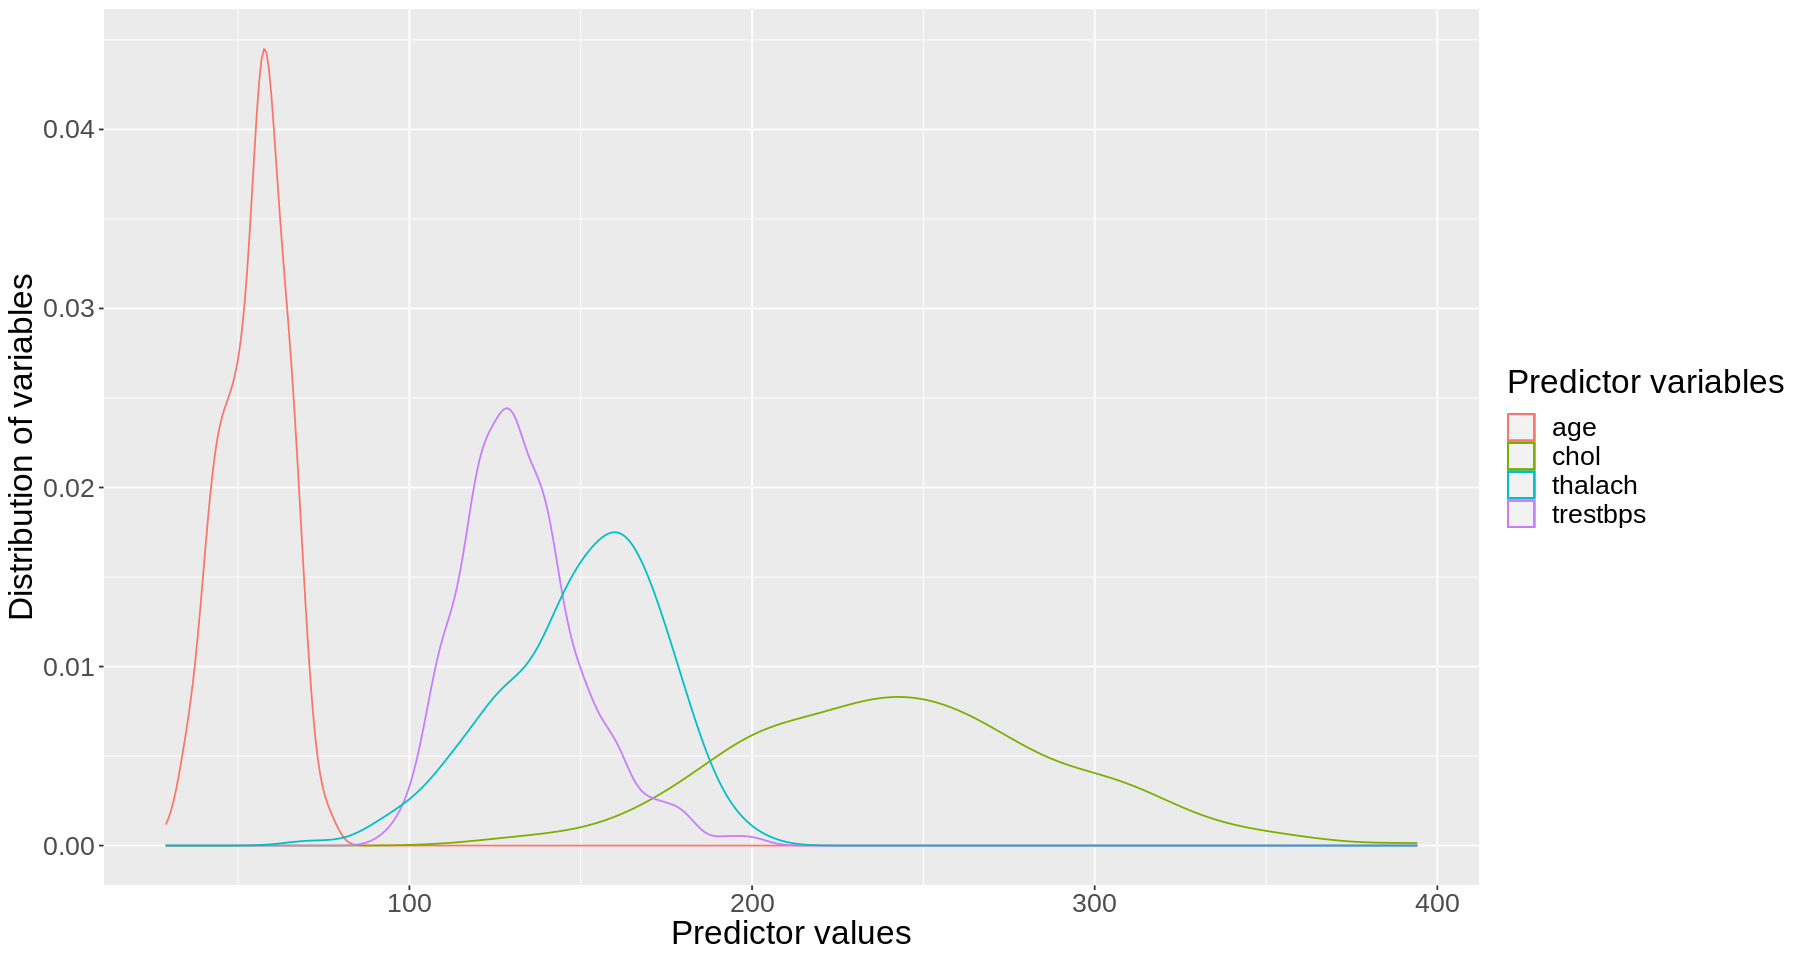

In [51]:
ggplot(heart_train) + 
    geom_density(aes(x=age, color = 'age')) +
    geom_density(aes(x=chol, color = 'chol')) +
    geom_density(aes(x=trestbps, color = 'trestbps')) +
    geom_density(aes(x=thalach, color = 'thalach'))+
    labs(x = "Predictor values", y = "Distribution of variables", color = "Predictor variables") +
    scale_fill_discrete(name = "Chest Pain Type", labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic")) +
    theme(text = element_text(size = 20))

## Methods

## Expected outcomes and significance